<a href="https://colab.research.google.com/github/khafifahshofi/Visualisasi-Jumlah-Kunjungan--Mancanegara-ke-Indonesia-Menurut-Kebangsaan-2021-2023/blob/main/UTS_PDAB_2304220023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset : Titanic
1. Eksplorasi Awal
      
      a. Berapa jumlah total penumpang dalam data?
      
      b. Berapa jumlah penumpang yang selamat? Tampilkan dalam bentuk tabel dan grafik!

      c. Berapa rata-rata umur penumpang? Dan siapa penumpang termudan dan tertua
      
      d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan
      
      e. Tampilkan jumlah penumpang berdasarkan kelas(Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset Titanic
df = pd.read_csv("/content/Titanic-Dataset.csv")  # Ganti path jika perlu

# a. Jumlah total penumpang
total_penumpang = len(df)
print("a. Jumlah total penumpang dalam data:", total_penumpang)




a. Jumlah total penumpang dalam data: 891


In [7]:
# b. Jumlah penumpang yang selamat dan tidak selamat
tabel_selamat = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'}).reset_index()
tabel_selamat.columns = ['Status', 'Jumlah']

print("\nb. Jumlah penumpang berdasarkan status keselamatan:")
print(tabel_selamat.to_string(index=False))


b. Jumlah penumpang berdasarkan status keselamatan:
       Status  Jumlah
Tidak Selamat     549
      Selamat     342


In [8]:
# c. Rata-rata umur penumpang
rata_rata_umur = df['Age'].mean()
penumpang_termuda = df['Age'].min()
penumpang_tertua = df['Age'].max()

print("c. Rata-rata umur penumpang:", round(rata_rata_umur, 2))
print("   Penumpang termuda:", penumpang_termuda)
print("   Penumpang tertua:", penumpang_tertua)


c. Rata-rata umur penumpang: 29.7
   Penumpang termuda: 0.42
   Penumpang tertua: 80.0



d. Jumlah penumpang berdasarkan jenis kelamin:
Jenis Kelamin  Jumlah
         male     577
       female     314
   Jenis kelamin yang lebih banyak: male


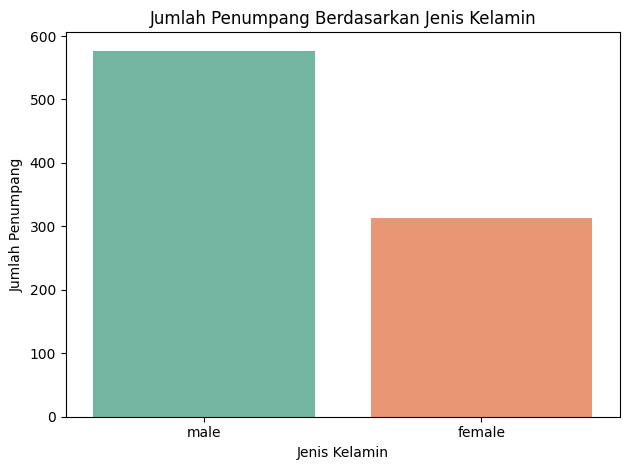

In [9]:
# d. Jumlah penumpang berdasarkan jenis kelamin
tabel_gender = df['Sex'].value_counts().reset_index()
tabel_gender.columns = ['Jenis Kelamin', 'Jumlah']

print("\nd. Jumlah penumpang berdasarkan jenis kelamin:")
print(tabel_gender.to_string(index=False))

# Siapa yang lebih banyak?
lebih_banyak = tabel_gender.loc[tabel_gender['Jumlah'].idxmax(), 'Jenis Kelamin']
print("   Jenis kelamin yang lebih banyak:", lebih_banyak)

# Visualisasi
sns.barplot(data=tabel_gender, x='Jenis Kelamin', y='Jumlah', hue='Jenis Kelamin', palette='Set2', legend=False)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.tight_layout()
plt.show()



e. Jumlah penumpang berdasarkan kelas:
 Kelas  Jumlah
     1     216
     2     184
     3     491
   Persentase penumpang di kelas 1: 24.24%


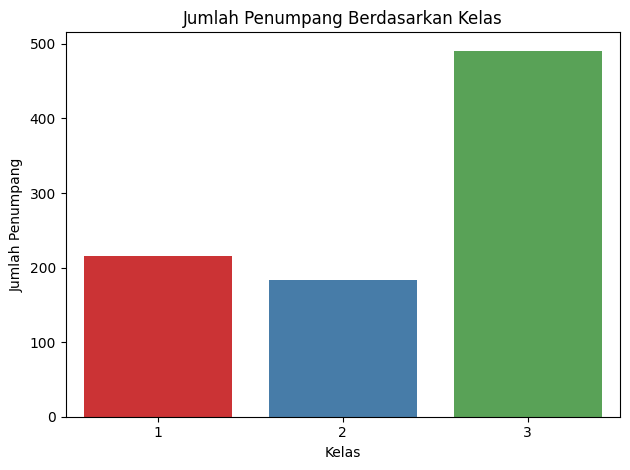

In [10]:
# e. Jumlah penumpang berdasarkan kelas
tabel_kelas = df['Pclass'].value_counts().sort_index().reset_index()
tabel_kelas.columns = ['Kelas', 'Jumlah']

# Hitung persentase kelas 1
jumlah_kelas_1 = df[df['Pclass'] == 1].shape[0]
persen_kelas_1 = (jumlah_kelas_1 / len(df)) * 100

print("\ne. Jumlah penumpang berdasarkan kelas:")
print(tabel_kelas.to_string(index=False))
print(f"   Persentase penumpang di kelas 1: {persen_kelas_1:.2f}%")

# Visualisasi
sns.barplot(data=tabel_kelas, x='Kelas', y='Jumlah', hue='Kelas', palette='Set1', legend=False)
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.tight_layout()
plt.show()


2. Preprocessing

 a. Apakah terdapa missing value pada data?

 b. Jika ya, apa yang anda lakukan?

 c. Apakah terdapat outlier pad data tersebut? Jelaskan apa itu outlier!

 d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

 e. Jika dibutuhkan silakan lakukan

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load dataset Titanic dari file CSV lokal
df = pd.read_csv("Titanic-Dataset.csv")

# 2a. Memeriksa Missing Values
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# 2b. Menangani Missing Values
# Mengganti missing values pada kolom 'Age' dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mengganti missing values pada kolom 'Embarked' dengan modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Menghapus baris dengan missing values pada 'Cabin' (banyak missing values)
df.drop(columns=['Cabin'], inplace=True)

# Memeriksa missing values setelah penanganan
print("\nMissing values after handling:\n", df.isnull().sum())

# Cek beberapa baris pertama setelah penanganan missing values
print("\nSample data after handling missing values:\n", df.head())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Sample data after handling missing values:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embark

Penjelasan :
- Mengganti missing values pada kolom 'Age' dengan median
- Mengganti missing values pada kolom 'Embarked' dengan modus
- Menghapus baris dengan missing values pada 'Cabin' (banyak missing values)
- Memeriksa missing values setelah penanganan

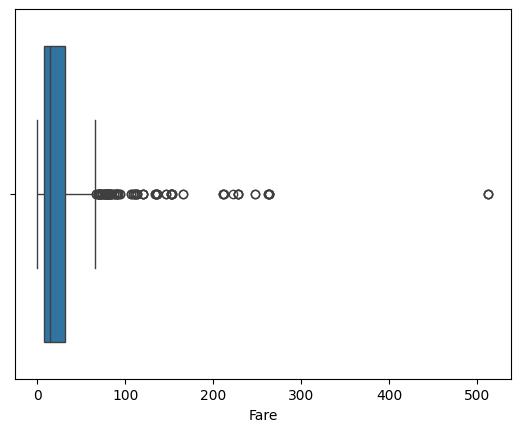

Outliers for 'Fare': Lower bound = -26.724, Upper bound = 65.6344


In [13]:
# 2c. Memeriksa Outliers
# Menggunakan boxplot untuk visualisasi outlier pada kolom 'Fare'
sns.boxplot(x=df['Fare'])
plt.show()

# Menghitung IQR untuk kolom 'Fare' (atau kolom lain yang relevan)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outliers for 'Fare': Lower bound = {lower_bound}, Upper bound = {upper_bound}")


Penjelasan : Berdasarkan hasil perhitungan menggunakan metode Interquartile Range (IQR), diperoleh bahwa batas bawah (lower bound) nilai wajar untuk variabel Fare adalah sebesar -26,724, dan batas atas (upper bound) adalah sebesar 65,6344. Karena nilai Fare tidak mungkin bernilai negatif, maka batas bawah tidak relevan secara praktis. Namun, terdapat sejumlah data yang memiliki nilai Fare lebih besar dari 65,6344, yang secara statistik dikategorikan sebagai outlier.

Outlier adalah observasi dalam data yang memiliki nilai ekstrem, baik jauh lebih kecil maupun jauh lebih besar dibandingkan dengan nilai-nilai lainnya, sehingga dapat memengaruhi analisis statistik secara signifikan.



In [14]:
# 2d. Menangani outlier
# Simpan jumlah data sebelum outlier dihapus
original_rows = df.shape[0]

# Hapus outlier pada kolom 'Fare'
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Tampilkan hasil
print(f"Jumlah data sebelum outlier dihapus: {original_rows}")
print(f"Jumlah data setelah outlier dihapus: {df.shape[0]}")
print(f"Jumlah baris yang dihapus (outlier): {original_rows - df.shape[0]}")



Jumlah data sebelum outlier dihapus: 891
Jumlah data setelah outlier dihapus: 775
Jumlah baris yang dihapus (outlier): 116


Penjelasan : karena dapat menyebabkan bias lebih baik ditangani saja dengan cara di hapus.

In [15]:
# 2e. Standarisasi / Scaling
# Jika dibutuhkan, kita bisa men-standarisasi kolom numerik seperti 'Age' dan 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Cek hasil transformasi
print("\nSample data after preprocessing:\n", df.head())


Sample data after preprocessing:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex       Age  SibSp  \
0                       Braund, Mr. Owen Harris    male -0.528321      1   
2                        Heikkinen, Miss. Laina  female -0.215182      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.489381      1   
4                      Allen, Mr. William Henry    male  0.489381      0   
5                              Moran, Mr. James    male -0.058613      0   

   Parch            Ticket      Fare Embarked  
0      0         A/5 21171 -0.779117        S  
2      0  STON/O2. 3101282 -0.729373        S  
3      0            113803  2.599828        S  
4      0            373450 -0.720161        S  
5      0            330877 -0.690071        Q  


3. Modelling

  a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut
  
  b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?
  
  c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing odel dan cara kerjanya
  
  d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing  metrik evaluasi tersebut!
  
  e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik

3a. Pembagian data menjadi training dan testing penting agar kita bisa :

- Melatih model pada data yang dikenal (training)
- Mengukur performa pada data baru yang tidak dikenal (testing) Ini mencegah model overfitting (terlalu hafal data) dan menguji kemampuan generalisasi.

In [18]:
#PROSES PEMBAGIAN DATA MENJADI TRAINING DAN TESTING
from sklearn.model_selection import train_test_split

# Misalnya kita pakai fitur sederhana: Pclass, Sex, Age, Fare
# Ubah kolom 'Sex' ke numerik dulu
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Pilih fitur dan target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Bagi data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 620
Jumlah data testing: 155


3.b Kita gunakan 80% training dan 20% testing
  
  Alasannya : 80% cukup banyak untuk melatih model dan 20% cukup untuk menguji performa model secara adil. Ini adalah praktik umum (standar industri)



In [21]:
# 3.c buat tiga Model Klasifikasi
# Hapus kolom yang tidak diperlukan jika ada
cols_to_drop = ['Survived', 'Name', 'Ticket']
# Cek apakah kolom 'Cabin' ada sebelum menghapusnya
if 'Cabin' in df.columns:
    cols_to_drop.append('Cabin')

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=cols_to_drop, axis=1)
y = df['Survived']

# Convert 'Embarked' and 'Sex' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Embarked', 'Sex'], drop_first=True) # Convert categorical features to numerical

# Split data menjadi training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# 2. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluasi hasil model
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Logistic Regression Accuracy: 0.6774193548387096
KNN Accuracy: 0.535483870967742
Random Forest Accuracy: 0.6645161290322581


Penjelasan :

### 1. **Logistic Regression**
   - **Cara Kerja**: Menggunakan fungsi logistik untuk memetakan hasil linear menjadi probabilitas kelas target.
   - **Kelebihan**: Mudah dipahami, cocok untuk hubungan linier antara fitur dan target.
   - **Kelemahan**: Tidak cocok untuk data yang sangat kompleks.

### 2. **K-Nearest Neighbors (KNN)**
   - **Cara Kerja**: Mengklasifikasikan data berdasarkan kedekatannya dengan data lain, memilih kelas mayoritas dari k tetangga terdekat.
   - **Kelebihan**: Sederhana dan mudah dipahami.
   - **Kelemahan**: Mahal secara komputasi pada data besar, sangat bergantung pada pemilihan k.

### 3. **Random Forest**
   - **Cara Kerja**: Menggunakan banyak pohon keputusan untuk membuat prediksi, dan menggabungkan hasilnya untuk meningkatkan akurasi.
   - **Kelebihan**: Kuat dalam menangani data kompleks dan banyak fitur, mengurangi risiko overfitting.
   - **Kelemahan**: Lebih sulit diinterpretasi, lebih lambat untuk prediksi.

### Kesimpulan:
- **Logistic Regression**: Bagus untuk data linier.
- **KNN**: Bagus untuk data kecil atau tidak linier.
- **Random Forest**: Bagus untuk data kompleks dan besar.

In [23]:
# 3.d nilai evaluasi
from sklearn.metrics import classification_report, accuracy_score

# Prediksi untuk masing-masing model
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluasi Logistic Regression
print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("="*50)

# Evaluasi KNN
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("="*50)

# Evaluasi Random Forest
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("="*50)


Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        95
           1       0.66      0.35      0.46        60

    accuracy                           0.68       155
   macro avg       0.67      0.62      0.61       155
weighted avg       0.67      0.68      0.65       155

Akurasi: 0.6774193548387096
K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        95
           1       0.30      0.15      0.20        60

    accuracy                           0.54       155
   macro avg       0.45      0.46      0.44       155
weighted avg       0.48      0.54      0.49       155

Akurasi: 0.535483870967742
Random Forest
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        95
           1       0.60      0.40      0.48        60

    accuracy                           0.66       155
   macro avg       

Penjelasan:
- Accuracy: Berapa banyak prediksi yang benar dari seluruh data uji.

- Precision: Ketepatan dalam memprediksi penumpang yang selamat (positif).

- Recall: Seberapa banyak penumpang yang selamat berhasil ditemukan oleh model.

- F1-score: Rata-rata harmonik dari precision dan recall.



3.e

**Perbandingan dan Analisis:**
- Logistic Regression memiliki akurasinya paling tinggi (0.68) dan recall terbaik untuk kelas 0, tetapi kurang baik dalam mengidentifikasi kelas 1. Mungkin hal ini terjadi karena ketidakseimbangan data (lebih banyak penumpang yang tidak selamat daripada yang selamat).

- KNN memiliki akurasi terendah (0.54) dan recall sangat rendah untuk kelas 1. KNN sangat sensitif terhadap pemilihan nilai k dan lebih terpengaruh oleh data yang tidak seimbang.

- Random Forest memiliki akurasi yang cukup baik (0.66) dan recall yang baik untuk kelas 0, tetapi kurang bagus untuk kelas 1. Random Forest lebih dapat diandalkan daripada KNN karena menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

**Kesimpulan:**
- Logistic Regression adalah model yang paling baik dari ketiganya dalam hal akurasi, namun kurang dalam mendeteksi kelas 1.

- Random Forest dapat menjadi pilihan yang lebih baik daripada KNN, karena lebih stabil meskipun recall untuk kelas 1 masih perlu ditingkatkan.

4. Evaluasi

  a. Berdasarkan classificationreport model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?
  
  b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Misalnya kita pilih Logistic Regression sebagai model terbaik
y_pred = logreg.predict(X_test)

# a. Classification report
report = classification_report(y_test, y_pred, output_dict=True)
precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision untuk penumpang selamat (1): {precision_selamat:.2f}")
print(f"Recall untuk penumpang selamat (1): {recall_selamat:.2f}")

Precision untuk penumpang selamat (1): 0.66
Recall untuk penumpang selamat (1): 0.35


In [25]:
# b. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix format:
# [[TN, FP],
#  [FN, TP]]
TN, FP, FN, TP = cm.ravel()

print(f"Jumlah penumpang yang diprediksi selamat: {TP + FP}")
print(f"Jumlah penumpang yang benar-benar selamat (True Positives): {TP}")

Jumlah penumpang yang diprediksi selamat: 32
Jumlah penumpang yang benar-benar selamat (True Positives): 21
